<a href="https://colab.research.google.com/github/tether007/pima-diabetes-prediction/blob/main/PimaDiabetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub
!pip install kaggle



In [ ]:
import os
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")


kaggle_dataset = "nancyalaswad90/review"

# If dataset directory already exists
if data_path.is_dir():
    print(f"{data_path} directory exists.")
else:
    print(f"Did not find {data_path} directory, creating one...")
    data_path.mkdir(parents=True, exist_ok=True)

    # Downloading dataset using kaggle API
    print(f"Downloading {kaggle_dataset} dataset...")
    os.system(f"kaggle datasets download -d {kaggle_dataset} -p {data_path}")

    # Unzip dataset
    zip_path = data_path / (kaggle_dataset.split("/")[-1] + ".zip")
    if zip_path.exists():
        print("Unzipping dataset...")
        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall(data_path)
        print("Dataset ready!")
    else:
        print("Download failed: zip file not found.")


data directory exists.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data_initial = pd.read_csv("/content/data/diabetes.csv")
df = pd.read_csv("/content/data/diabetes.csv")


In [ ]:
print(df.shape,data_initial.shape)#total 768 data entries are there with 9 attributes

(768, 9) (768, 9)


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#1 . Data PreProcessing / Data Cleaning

<Axes: >

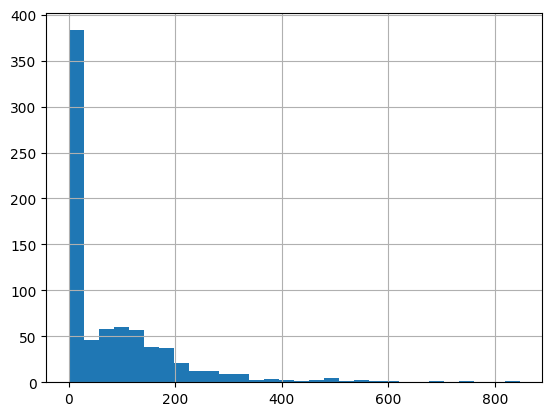

In [ ]:
df['Insulin'].hist(bins=30)#x:Insulin count y:no:of ppl in dataset with that insulin level (the range of insulin is divided by 30)
# what does this give us, it gives us tht ppl with low insulin count are more in the dataset
#having zero insulin is impossible so let us make them into NaN ie: not recorded


In [ ]:
df.isnull().sum()#gives the sum of null  values in each column which is nothing right now

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.isna().sum() #again nothing is NaN too

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# so let us take the "insulin " and "SkinThickness"and whereever 0 is ther make it NaN

df.replace({'Insulin':0,'SkinThickness':0},np.nan,inplace=True)
data=df

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,NaN,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,NaN,NaN,30.1,0.349,47,1


In [ ]:
from sklearn.impute import KNNImputer#we cleaned all missing values with the 3-NN values and also obtained a clean np.array
imputer = KNNImputer(n_neighbors=3)
df = imputer.fit_transform(df)
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
df

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
df = pd.DataFrame(df, columns=columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.304348,0.133814,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.239130,0.063301,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.250000,0.217548,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.173913,0.096154,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.304348,0.185096,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.445652,0.199519,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.217391,0.183494,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.173913,0.117788,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.307971,0.128205,0.448584,0.115713,0.433333,1.0


## 1.1 . Visualize the diabetics vs non diabetics(EDA)

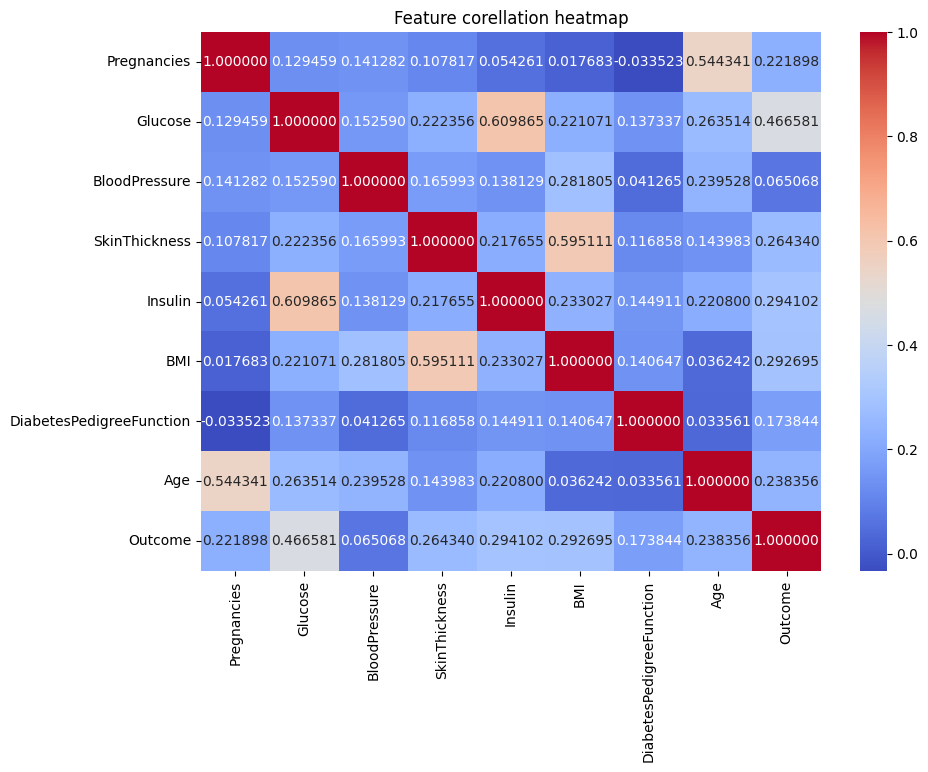

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=df.corr()#gives pearsons correlation coeff(how closely two things are related in a straight line pattern)
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt="2f")
plt.title("Feature corellation heatmap")
plt.show()

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

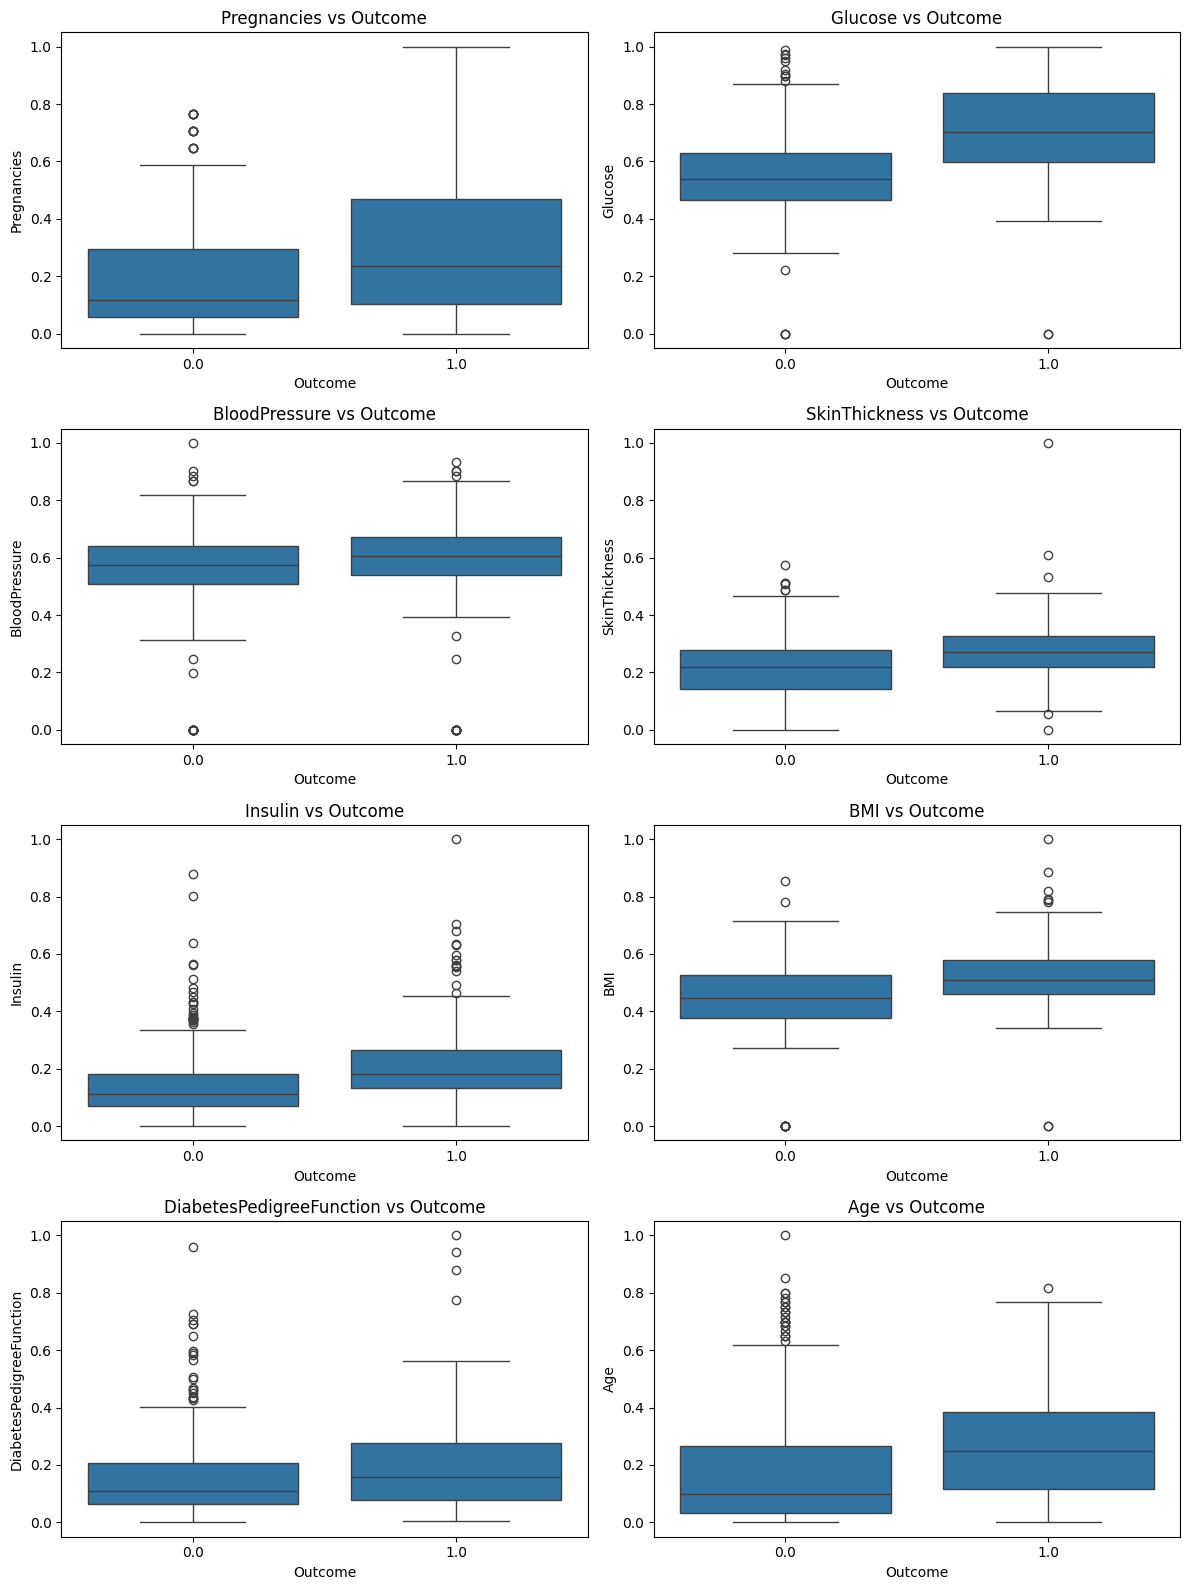

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns[:-1]  # exclude Outcome
num_features = len(features)

# Adjust grid automatically
rows = (num_features + 1) // 2  # 2 columns
plt.figure(figsize=(12, rows*4))

for i, feature in enumerate(features):
    plt.subplot(rows, 2, i+1)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs Outcome')

plt.tight_layout()
plt.show()


# 2 . Train_Test_split

In [ ]:
from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]#every col exccept last(features)
y=df.iloc[:,-1]#last col outcome(labelS)

In [ ]:
y

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,               # features and target
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # reproducible results
    stratify=y          # preserves class distribution
)


# 3 .  Building baseline Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating the model
baseline_model = LogisticRegression(max_iter=1000, class_weight='balanced')#(1/1+e^-x)

# Train the model
baseline_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

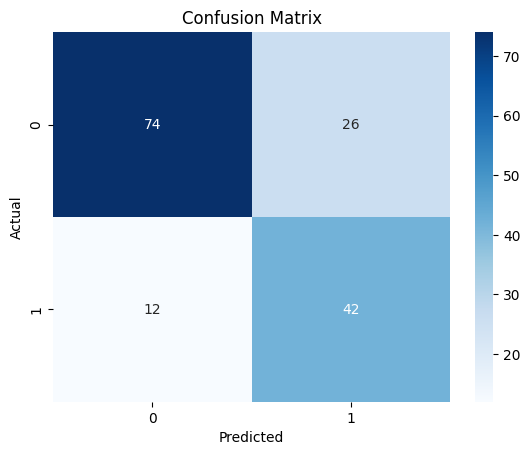

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:,1]  # probability of being diabetic

# Metrics
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("Recall:", recall_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Lets make a Metrics dataframe func

def metrics_df(y_test,y_pred,y_proba)->pd.DataFrame:

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    # Wrap dictionary in a list to make a single-row DataFrame
    return pd.DataFrame([metrics])

met_baseline=metrics_df(y_test=y_test,y_pred=y_pred,y_proba=y_proba)

# 4 . Building Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier(criterion="entropy",#uses info gain
                                max_depth=4,
                                min_samples_split=10,    # min samples to split a node
                                random_state=42,
                                class_weight='balanced' # handle class imbalance
)

## 4.1 . Train the model

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_split=10, random_state=42)

## 4.2 . Test the model(predictions)

In [ ]:
y_pred_dt = dt_model.predict(X_test)#actual pred if 1 or 0
y_proba_dt = dt_model.predict_proba(X_test)[:,1]  # probability of being diabetic(in percent)


In [ ]:
print(y_pred_dt[:10],y_proba_dt[:10])

[1. 0. 0. 1. 0. 1. 1. 1. 0. 1.] [0.92820398 0.24266936 0.01508978 0.61705541 0.01508978 0.61705541
 0.61705541 0.92820398 0.01508978 0.92820398]


In [ ]:
met_dt=metrics_df(y_test=y_test, y_pred=y_pred_dt, y_proba=y_proba_dt)

met_comp=pd.concat([met_baseline,met_dt],ignore_index=True)
met_comp

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,0.753247,0.617647,0.777778,0.688525,0.819815
1,0.720779,0.569620,0.833333,0.676692,0.772500


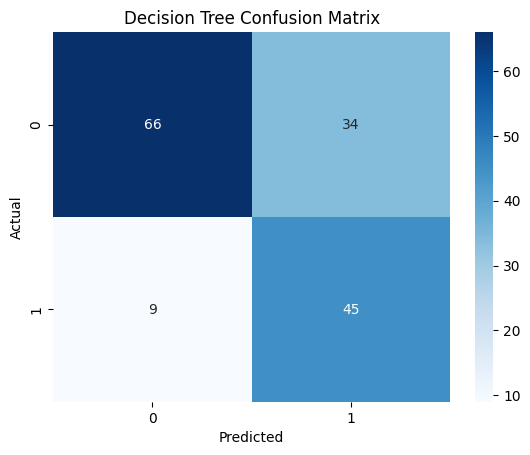

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd

feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp)


                    Feature  Importance
1                   Glucose    0.461114
5                       BMI    0.201200
7                       Age    0.123871
3             SkinThickness    0.073642
4                   Insulin    0.066464
2             BloodPressure    0.028836
6  DiabetesPedigreeFunction    0.023271
0               Pregnancies    0.021601


# 5 . Advance models : (Gradient Boost and Random forest)


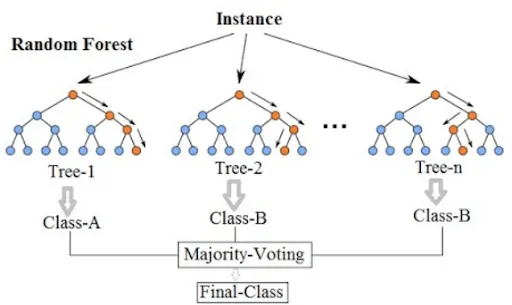

# i . Random Forest Classifier

* An ensemble of Decision Trees.

* Each tree is trained on a random subset of data and a random subset of features.

* Predictions are averaged (for regression) or majority-voted (for classification).

* Reduces overfitting of single Decision Trees → better generalization.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

## 5.1 . Train the model

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=200, random_state=42)

## 5.2 . Test the model with pred and pred_proba

In [ ]:
y_pred_rf=rf_model.predict(X_test)
y_proba_rf=rf_model.predict_proba(X_test)[:,1]

## 5.3 . Metrics

In [ ]:
# Metrics
met_rf=metrics_df(y_test, y_pred_rf, y_proba_rf)
met_comp=pd.concat([met_baseline,met_dt,met_rf],ignore_index=True)
# Feature importance
import pandas as pd
feat_imp_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feat_imp_rf)
(met_comp)

                    Feature  Importance
1                   Glucose    0.310339
4                   Insulin    0.175662
5                       BMI    0.145618
7                       Age    0.115904
3             SkinThickness    0.086185
6  DiabetesPedigreeFunction    0.070662
0               Pregnancies    0.053489
2             BloodPressure    0.042141


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,0.753247,0.617647,0.777778,0.688525,0.819815
1,0.720779,0.569620,0.833333,0.676692,0.772500
2,0.720779,0.579710,0.740741,0.650407,0.820370


# ii . Gradient boost classifier
What it is:

Builds trees sequentially, each tree tries to correct errors of the previous trees.

Focuses on hard-to-predict samples, improving accuracy.

Popular implementations: XGBoost, LightGBM, CatBoost.

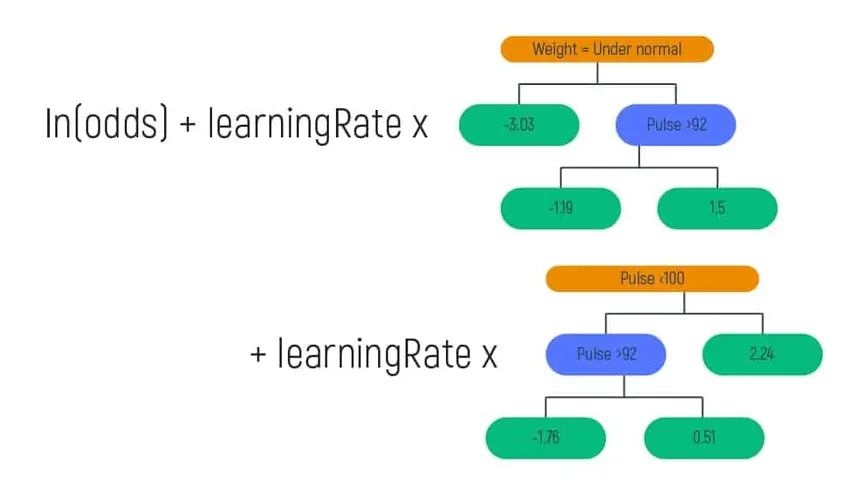

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize
gb_model = GradientBoostingClassifier(
      n_estimators=100,
      learning_rate=0.05,
      max_depth=2,       # shallow trees
      min_samples_split=10,
      min_samples_leaf=5,
      random_state=42
)

# Train
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:,1]

# Metrics
met_GBC=metrics_df(y_test, y_pred_gb, y_proba_gb)
met_comp=pd.concat([met_baseline,met_dt,met_rf,met_GBC],ignore_index=True)
# Feature importance
feat_imp_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feat_imp_gb)
met_comp

                    Feature  Importance
1                   Glucose    0.516551
5                       BMI    0.173792
7                       Age    0.103978
4                   Insulin    0.075380
6  DiabetesPedigreeFunction    0.064931
0               Pregnancies    0.027551
3             SkinThickness    0.024685
2             BloodPressure    0.013132


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,0.753247,0.617647,0.777778,0.688525,0.819815
1,0.720779,0.569620,0.833333,0.676692,0.772500
2,0.720779,0.579710,0.740741,0.650407,0.820370
3,0.720779,0.622222,0.518519,0.565657,0.825185


In [ ]:
!pip install xgboost

# iii . XGboost classifier

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),
    random_state=42
)
xgb_model.fit(X_train, y_train)

#predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

#metrics
met_xgboost=metrics_df(y_pred=y_pred_xgb,y_proba=y_proba_xgb,y_test=y_test)
met_comp=pd.concat([met_baseline,met_dt,met_rf,met_GBC,met_xgboost],ignore_index=True)
met_comp

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,0.753247,0.617647,0.777778,0.688525,0.819815
1,0.720779,0.569620,0.833333,0.676692,0.772500
2,0.720779,0.579710,0.740741,0.650407,0.820370
3,0.720779,0.622222,0.518519,0.565657,0.825185
4,0.759740,0.630769,0.759259,0.689076,0.832407


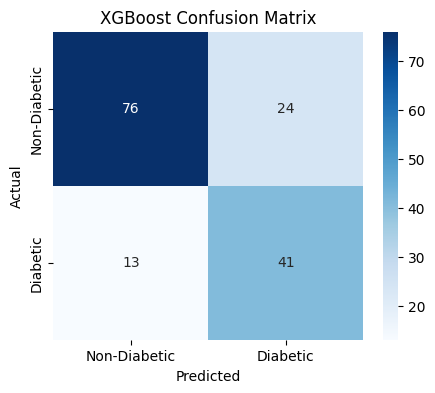

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic","Diabetic"], yticklabels=["Non-Diabetic","Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()